In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix, matthews_corrcoef

In [28]:
df = pd.read_csv("/content/Differences_Coding_Coding_Bruna_Dec_1_complete.csv",  encoding='ISO-8859–1')
df = df.drop(['sub_cat', 'UHA','IHA','DA','VIT','GHQ','memo'], axis=1) 
df.fillna(0, inplace=True)
df.head()

,number,command,care,HU,MP,CI,HI,RS
0,12161,what time is it,0,0.0,0.0,0.0,0.0,0.0
1,15770,close play some music please,1,1.0,0.0,0.0,0.0,0.0
2,18502,echo,0,0.0,0.0,0.0,0.0,0.0
3,37720,play pandora radio,0,0.0,0.0,0.0,0.0,0.0
4,25259,talk radio seven seventy,0,0.0,0.0,0.0,0.0,0.0


In [29]:
def classify(subcat):
  X = df['command']
  Y = df[subcat]
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
  vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 3), binary=True)
  train_vectors = vectorizer.fit_transform(X_train)
  test_vectors = vectorizer.transform(X_test)
  print("Distribution")
  print()
  print(Y.value_counts())
  print('###################################################')
  print("Logistic Regression")
  print()
  parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['lbfgs', 'liblinear'],
  }
  logreg = LogisticRegression(class_weight = 'balanced',max_iter = 10000)
  clf = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='roc_auc_ovr_weighted',        
                   cv=10)
  clf.fit(train_vectors,y_train)
  print("Tuned Hyperparameters :", clf.best_params_)
  print("roc_auc_ovr_weighted :",clf.best_score_)

  best_logreg = LogisticRegression(class_weight = 'balanced',max_iter = 10000,C=1,penalty='l2',solver='lbfgs')
  best_logreg.fit(train_vectors,y_train)
  pred = best_logreg.predict(test_vectors)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='binary')
  recall = recall_score(y_test, pred, average='binary')
  f1 = f1_score(y_test, pred, average='binary')
  mc = matthews_corrcoef(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print("Best logistic regression model values")
  print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, roc_auc = %.3f, mathews corr = %.3f" % (accuracy, precision, recall, f1,roc_auc,mc))
  print()
  cf_matrix = confusion_matrix(y_test, pred)
  sns.heatmap(cf_matrix, annot=True, fmt='g', vmin=9999999, vmax=9999999, linewidths=.5,cbar=False).set(title="Confusion Matrix")
  plt.show()
  print('###################################################')
  print("Naive Bayes")
  print()

  cnb = ComplementNB()
  cnb.fit(train_vectors,y_train)
  pred = cnb.predict(test_vectors)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='binary')
  recall = recall_score(y_test, pred, average='binary')
  f1 = f1_score(y_test, pred, average='binary')
  mc = matthews_corrcoef(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print("Naive bayes model values")
  print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, roc_auc = %.3f, mathews corr = %.3f" % (accuracy, precision, recall, f1,roc_auc,mc))
  cf_matrix = confusion_matrix(y_test, pred)
  print()
  sns.heatmap(cf_matrix, annot=True, fmt='g', vmin=9999999, vmax=9999999, linewidths=.5,cbar=False).set(title="Confusion Matrix")
  plt.show()  

Distribution

0.0    8381
1.0    1619
Name: HU, dtype: int64
###################################################
Logistic Regression

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
roc_auc_ovr_weighted : 0.9797606679944153
Best logistic regression model values
accuracy = 0.971, precision = 0.893, recall = 0.917, f1 = 0.905, roc_auc = 0.949, mathews corr = 0.888



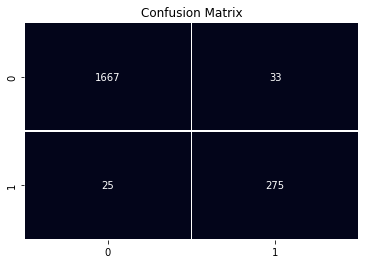

###################################################
Naive Bayes

Naive bayes model values
accuracy = 0.936, precision = 0.728, recall = 0.920, f1 = 0.813, roc_auc = 0.930, mathews corr = 0.783



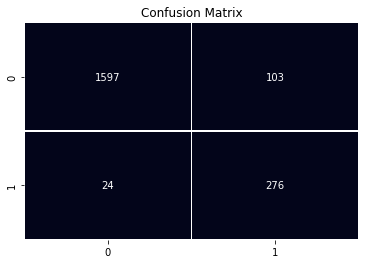

In [9]:
classify('HU')

Distribution

0.0    9833
1.0     167
Name: HI, dtype: int64
###################################################
Logistic Regression

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
roc_auc_ovr_weighted : 0.9851147134419198
Best logistic regression model values
accuracy = 0.995, precision = 0.871, recall = 0.794, f1 = 0.831, roc_auc = 0.896, mathews corr = 0.829



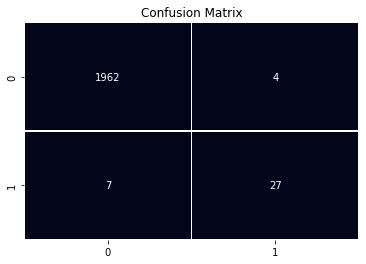

###################################################
Naive Bayes

Naive bayes model values
accuracy = 0.977, precision = 0.417, recall = 0.882, f1 = 0.566, roc_auc = 0.930, mathews corr = 0.597



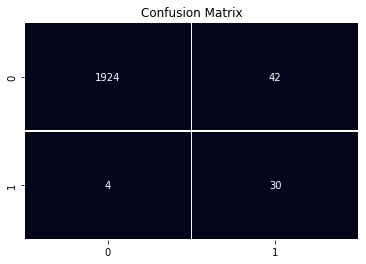

In [30]:
classify('HI')

Distribution

0.0    9266
1.0     734
Name: MP, dtype: int64
###################################################
Logistic Regression

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
roc_auc_ovr_weighted : 0.9993632720760285
Best logistic regression model values
accuracy = 0.996, precision = 0.965, recall = 0.972, f1 = 0.968, roc_auc = 0.984, mathews corr = 0.966



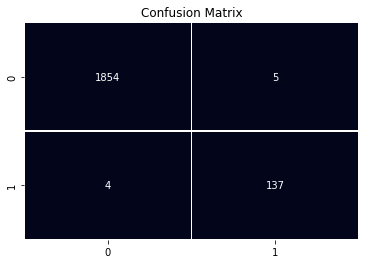

###################################################
Naive Bayes

Naive bayes model values
accuracy = 0.971, precision = 0.715, recall = 0.979, f1 = 0.826, roc_auc = 0.975, mathews corr = 0.823



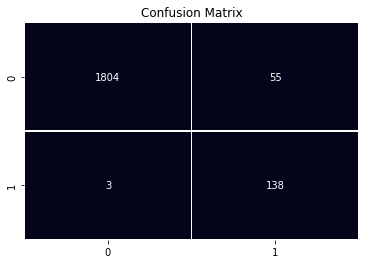

In [13]:
classify('MP')

Distribution

0.0    9503
1.0     497
Name: CI, dtype: int64
###################################################
Logistic Regression

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
roc_auc_ovr_weighted : 0.9486860412251852
Best logistic regression model values
accuracy = 0.987, precision = 0.844, recall = 0.823, f1 = 0.833, roc_auc = 0.908, mathews corr = 0.827



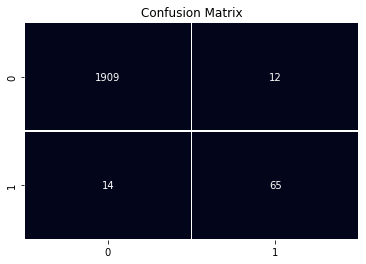

###################################################
Naive Bayes

Naive bayes model values
accuracy = 0.959, precision = 0.489, recall = 0.848, f1 = 0.620, roc_auc = 0.906, mathews corr = 0.626



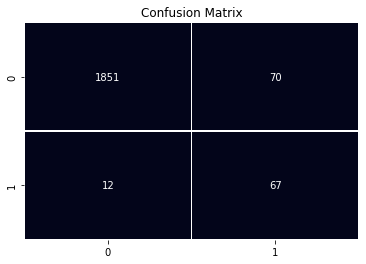

In [14]:
classify('CI')

Distribution

0.0    9922
1.0      78
Name: RS, dtype: int64
###################################################
Logistic Regression

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
roc_auc_ovr_weighted : 0.9806332086517493
Best logistic regression model values
accuracy = 0.998, precision = 0.750, recall = 0.818, f1 = 0.783, roc_auc = 0.908, mathews corr = 0.782



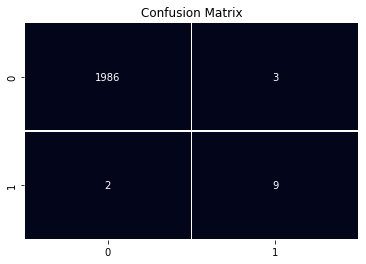

###################################################
Naive Bayes

Naive bayes model values
accuracy = 0.981, precision = 0.196, recall = 0.818, f1 = 0.316, roc_auc = 0.900, mathews corr = 0.394



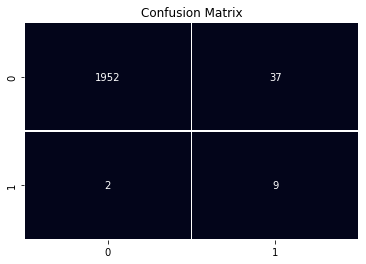

In [15]:
classify('RS')